In [519]:
from IPython.core.display import display, HTML
display(HTML('''
<script type="text/javascript"> 
var currentPermission;
Notification.requestPermission( function(result) { currentPermission = result  } );

var myButton = document.querySelector(".my_button");
var mailNotification = new Notification("Андрей Чернышёв");
</script>

<button class="my_button ui-button button" id="permission_ask">Ask for permission</button>
'''))




In [ ]:
var currentPermission;
Notification.requestPermission( function(result) { currentPermission = result  } );

In [506]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize
from math import sqrt
from sklearn.datasets import load_iris, load_breast_cancer
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 7, 7
from numpy import inf
import random

class Node():
    """Узел дерева
    """
    def __init__(self, max_depth, min_count):
        self.max_depth = max_depth  #  максимальная глубина дерева
        self.min_count = min_count  #  минимальное количество элементов в листе
        self.split_feature = None  #  номер признака, по которому ведется разбиение
        self.split_val = None  #  величина разбиения
        self.left = None  #  левое поддерево
        self.right = None  #  правое поддерево
        self.items = None  #  объекты в узле
        
    def split(self, x, y, split_feature, split_val):
        n = len(y)
        y_left  = [y[i] for i in range(n) if x[i][split_feature] < split_val]
        y_right = [y[i] for i in range(n) if x[i][split_feature] >= split_val]
        return y_left, y_right
    
    def split_indexes(self, x, y, split_feature, split_val):
        n = len(y)
        indexes_left  = [i for i in range(n) if x[i][split_feature] < split_val]
        indexes_right = [i for i in range(n) if x[i][split_feature] >= split_val]
#         print(f"left after split: {len(indexes_left)}")
#         print(f"right after split: {len(indexes_right)}")


        return indexes_left, indexes_right


    
    def best_split(self, X, y):
        """Выбор наилучшего параметра для разбиения
            X - матрица признаков
            y - вектор объектов
        Returns: 
            split_feature - индекс признака, по которому разбиваем
            split_val - численное значение
        """
        m = len(X[0])
        k = int(sqrt(m)) + 1
        np.random.seed(int(1000*random.random()))
        features = np.random.choice(m, k, replace=False)
#         print(f"X: {X}, m: {m}, features: {features}")
#         print(f"features for best split: {features}")

        max_gini = 999
        split_feature = features[0]
        split_val = X[0][0]
        for feature in features:
            for x in X:
#                 print(f'feature: {x[feature]}')
                y_left, y_right = self.split(X, y, feature, x[feature])
                gini_index = (len(y_left)*self.count_gini(y_left) + len(y_right)*self.count_gini(y_right)) / len(y)
                if gini_index < max_gini:
                    max_gini = gini_index
                    split_feature = feature
                    split_val = x[feature]
        return split_feature, split_val
                    

        
    def create_children(self, X, y):
        """Создание левого и правого поддерева текущего узла
        """
        n = len(y)
        self.split_feature, self.split_val = self.best_split(X, y)

        left_indexes, right_indexes = self.split_indexes(X, y, self.split_feature, self.split_val)
        
        y_left = [y[i] for i in left_indexes]
        y_right = [y[i] for i in right_indexes]
        x_left = [X[i] for i in left_indexes]
        x_right = [X[i] for i in right_indexes]            


        if 0 < len(y_left):
            self.left = Node(self.max_depth-1, self.min_count)
            self.left.fit(x_left, y_left)

        if 0 < len(y_right):
            self.right = Node(self.max_depth-1, self.min_count)
            self.right.fit(x_right, y_right)
        
        
    def fit(self, X, y):
        """Запуск обучения узла
        
        X - матрица признаков
        y - вектор значений целевой переменной
        """
        self.items = list(y)
        if self.max_depth > 0 and self.min_count <= len(self.items):
            self.create_children(X, y)
        
    @property
    def node_predict(self):
        """ Получить предсказание от текущего узла  
        Returns:
            Номер класса, максимальное количество элементов которого содержится в данном узле
        """
        all_classes = [(self.items.count(item), item) for item in set(self.items)]
        # 0 - count, 1 - value
        return max(all_classes)[1]
    
    def predict(self, x):
        """ Предсказание значения целевой переменной
            x - вектор признаков
        Returns:
            Класс, к которому относится x
        """

        if self.left and x[self.split_feature] < self.split_val:
            return self.left.predict(x)
        elif self.right and x[self.split_feature] >= self.split_val:
            return self.right.predict(x)
        else:
            return self.node_predict


    def count_gini(self, y):
        """ Значение критерия Джини
        y - вектор объектов
        returns:
            Значение критерия Джини
        """
        p = [float(np.sum(y==val))/len(y) for val in np.unique(y)]
        return np.sum([p_i*(1-p_i) for p_i in p])
    def print_node(self, level=0):
#         print(" "*level, f"count: {len(self.items)}")
        pass
    

class DecisionTree():
    def __init__(self, max_depth, min_count):
        self.max_depth = max_depth
        self.min_count = min_count
        
    def fit(self, X, y):
        self.root = Node(self.max_depth, self.min_count)
        self.root.fit(X, y)
        
    def predict(self, X):
        return [self.predict_single(x) for x in X]
    
    def predict_single(self, x):
#         print('PREDICTING')
        return self.root.predict(x)

In [507]:
def accuracy_score(y_pred, y_test):
    check = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] == y_test[i]]
    return len(check) / len(y_test)


iris = load_iris()
X = list(iris.data)
y = list(iris.target)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

tree = DecisionTree(max_depth=7, min_count=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f"accuracy: {accuracy_score(y_pred, y_test)}")

accuracy: 0.9666666666666667


In [514]:
class RandomForest(object):
    def __init__(self, max_depth=3, min_count=1, n_estimators = 5):
        self.trees = [DecisionTree(max_depth=max_depth, min_count=min_count) for _ in range(n_estimators)]
        self.max_depth = max_depth
        self.min_count = min_count
        self.n_estimators = n_estimators
        
    @property
    def size(self):
        return self.n_estimators
    
    
    def fit(self, x, y):
        for tree in self.trees:
            new_x, new_y = self.select_features_to_fit(x, y)
            tree.fit(new_x, new_y)

    def predict(self, X):
        result = []
        for tree in self.trees:
            prediction = tree.predict(X)
            if result != []:
                for i in range(len(prediction)):
                    result[i] += prediction[i] / self.size 
            else:
                result = [i / self.size for i in prediction]
        result = [int(round(item)) for item in result]
        return result

    def test(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)
        self.fit(X_train, y_train)
        test_score = 0
        for tree in self.trees:
            test_score += accuracy_score(y_test, tree.predict(X_test)) / self.size
        print(f"Forest accuracy on test data: {accuracy_score(y_test, self.predict(X_test))}")
        
    def get_accuracy(self, X, y, n):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)
        self.trees = []
        self.n_estimators = 0
        res_x = [0]
        res_y = [0]
        for i in range(n):
            self.n_estimators += 1
            tree = DecisionTree(max_depth=self.max_depth, min_count=self.min_count)
            self.trees.append(tree)
            tree.fit(X_train, y_train)
            
            tree_score = accuracy_score(y_test, tree.predict(X_test))
            forest_score = accuracy_score(y_test, self.predict(X_test))
            print(f"{i} tree score: {tree_score}")
            print(f"{i} forest score: {forest_score}")
            
            res_x.append(self.size)
            res_y.append(forest_score)
        print(f"y_test: {y_test}")
        print("y_pred: {self.predict(X_test)}")
        return res_x, res_y




In [515]:
def draw(x,y):
    arr = [(x[i],y[i]) for i in range(len(x))]
    arr.sort(key=lambda p: p[0])
    new_y = [p[1] for p in arr]
    new_x = [p[0] for p in arr]
    plt.xlabel('Split criterion')
    plt.ylabel('Gini index')
    plt.plot(new_x, new_y)

In [516]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_new = []
y = list(y)
for item in X:
    X_new.append(list(item))
X = X_new

0 tree score: 0.8947368421052632
0 forest score: 0.8947368421052632
1 tree score: 0.9035087719298246
1 forest score: 0.9035087719298246
2 tree score: 0.9122807017543859
2 forest score: 0.9210526315789473
3 tree score: 0.9298245614035088
3 forest score: 0.9736842105263158
4 tree score: 0.8947368421052632
4 forest score: 0.9210526315789473
5 tree score: 0.9298245614035088
5 forest score: 0.9473684210526315
6 tree score: 0.9298245614035088
6 forest score: 0.9298245614035088
7 tree score: 0.9298245614035088
7 forest score: 0.9473684210526315
8 tree score: 0.9122807017543859
8 forest score: 0.9385964912280702
9 tree score: 0.9210526315789473
9 forest score: 0.9385964912280702
10 tree score: 0.9210526315789473
10 forest score: 0.9298245614035088
11 tree score: 0.9035087719298246
11 forest score: 0.9385964912280702
12 tree score: 0.9210526315789473
12 forest score: 0.9385964912280702
13 tree score: 0.9473684210526315
13 forest score: 0.956140350877193
14 tree score: 0.9210526315789473
14 fore

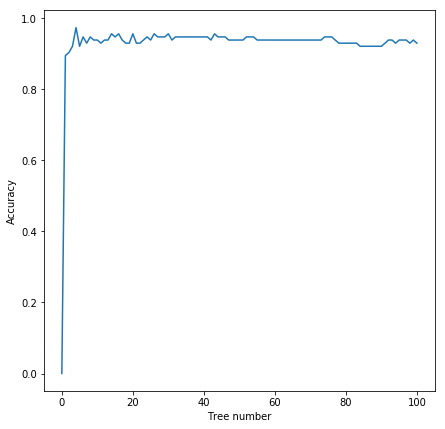

In [517]:
forest = RandomForest(max_depth=20, min_count=5)
x_acc, y_acc = forest.get_accuracy(X, y, 100)
plt.xlabel('Tree number')
plt.ylabel('Accuracy')
plt.plot(x_acc, y_acc)



1 forest score: 0.9298245614035088
2 forest score: 0.9473684210526315
3 forest score: 0.9473684210526315
4 forest score: 0.9649122807017544
5 forest score: 0.9736842105263158
6 forest score: 0.9649122807017544
7 forest score: 0.9649122807017544
8 forest score: 0.9649122807017544
9 forest score: 0.9649122807017544
10 forest score: 0.9649122807017544
11 forest score: 0.9736842105263158
12 forest score: 0.9649122807017544
13 forest score: 0.9824561403508771
14 forest score: 0.9824561403508771
15 forest score: 0.9736842105263158
16 forest score: 0.9736842105263158
17 forest score: 0.9736842105263158
18 forest score: 0.9649122807017544
19 forest score: 0.9736842105263158
20 forest score: 0.9649122807017544
21 forest score: 0.9649122807017544
22 forest score: 0.9736842105263158
23 forest score: 0.9824561403508771
24 forest score: 0.9824561403508771
25 forest score: 0.9824561403508771
26 forest score: 0.9736842105263158
27 forest score: 0.9736842105263158
28 forest score: 0.9736842105263158
2

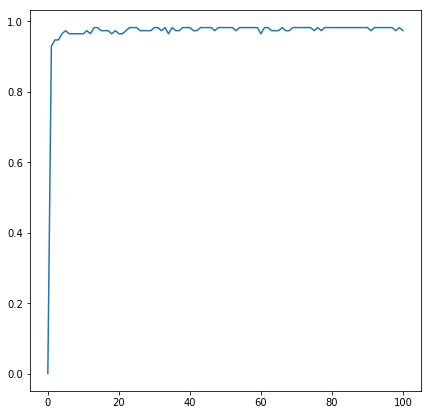

In [520]:
from sklearn.ensemble import RandomForestClassifier
rf_x = [0]
rf_y = [0]
for i in range(100):
    rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators = i+1)
    rf.fit(x_train, y_train)
    acc = accuracy_score(y_test, rf.predict(x_test))
    print(f"{1+i} forest score: {acc}")
    rf_x.append(i+1)
    rf_y.append(acc)
plt.plot(rf_x, rf_y)

